In [165]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import re
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary


import time
import sys

In [166]:
def filterWords(words):
    newWords = []
    for word in words:
        word = word.lower()
        word = word.replace("!", "")
        word = word.replace("?", "")
        word = word.replace(":", "")
        word = word.replace(";", "")
        word = word.replace(".", "")
        word = word.replace(",", "")
        word = word.replace('\'', "")
        word = word.replace('\"', "")
        #words below are ones where we want to connect together to ensure these words are joined
        word = word.replace("trumps", "trump")
        word = word.replace("russian", "russia")
        word = word.replace("russians", "russia")
        word = word.replace("dems", "democrat")
        word = word.replace("democrats", "democrat")
        word = word.replace("republicans", "republican")
        word = word.replace("libs", "liberal")
        word = word.replace("liberals", "liberal")
        word = word.replace("conservatives", "conservative")
        word = word.replace("taxes", "tax")
        word = word.replace("socialists", "socialist")
        word = word.replace("nationalists", "nationalist")
        word = word.replace("globalists", "globalist")
        word = word.replace("corrupted", "corrupt")
        newWords.append(word)
    return newWords

In [167]:
# Scrape Huffington (limited history = 15 pages --> 260 articles)
# Set up arrays 


def scrapeTest():
    articlesDF = []
    wordsDF = []
    for x in range (2, 15):
        url = 'https://www.huffingtonpost.com/section/politics?page=' + str(x)
#     article_title = []
#     article_URL = []
#     interaction_count = []
        html_doc = requests.get(url,  headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(html_doc.text, 'html.parser')

        articleList = soup.find('div', {'class': 'a-page__column--center'})
        articleList = articleList.find("div", {"class": "zone__content"})
        articles = articleList.findAll("div", {"class": "card"})
        
        print("______________________________")
        for article in articles:
                linkHTML = article.find("a", {"class": "card__link yr-card-headline"})
                link = linkHTML['href']
                linkURL = "https://www.huffingtonpost.com" + link
                articleTitle = article.find('div', {'class': 'card__headline__text'}).text
                articleTitle = articleTitle.replace('\n', '')
                wordsInTitle = articleTitle.split()
                wordsInTitle = filterWords(wordsInTitle)
                print(articleTitle)       
                html_docArticle = requests.get(linkURL,  headers={'User-Agent': 'Mozilla/5.0'})
                articleSoup = BeautifulSoup(html_docArticle.text, 'html.parser')
                socialMediaBar = articleSoup.find('ul', {'class': 'share-bar__list'})
                #print(socialMediaBar)
                #print(socialMediaBar)
                try:
                    socialMediaCount = socialMediaBar.find('span', {'class': 'share-bar__social-counts__number'}).text
                    if 'k' in socialMediaCount:
                        socialMediaCount = socialMediaCount.replace('k','')
                        try:
                            socialMediaCount = int(socialMediaCount) * 1000
                        except:
                            socialMediaCount = int(float(socialMediaCount) * 1000)
                    else:
                        socialMediaCount = int(socialMediaCount)
                    print(socialMediaCount)
                    articlesDF.append({'url': linkURL, 'articleTitle': articleTitle, 'socialMediaCount': socialMediaCount})
                    for word in wordsInTitle:
                        wordsDF.append({'url': linkURL, 'articleTitle': articleTitle, 'word': word,
                                        'socialMediaCount': socialMediaCount})
                except Exception as e:
                    print('Error on line {}'.format(sys.exc_info()[-1].tb_lineno), type(e).__name__, e)
                    #print("article has no social media count")
    return [articlesDF, wordsDF]
                    
#                 except:
#                     print("doesn't have socialMediaCount")
#                 print(" ")




In [168]:
dfs = scrapeTest()

______________________________
Stacey Abrams Says She’ll Run Again After Losing Fierce Battle For Georgia Governor
Error on line 36 AttributeError 'NoneType' object has no attribute 'text'
Obama Photographer Taunts Trump With Doggone Funny Suggestion For Chief Of Staff
Error on line 36 AttributeError 'NoneType' object has no attribute 'text'
44 Former Senators Warn Current Lawmakers Not To Blow It On Trump
630
Trump Administration Paid Firm Nearly $14 Million For Just 2 New Recruits
Error on line 36 AttributeError 'NoneType' object has no attribute 'text'
Anthony Scaramucci Is Still Bitter About Being Fired By John Kelly
Error on line 36 AttributeError 'NoneType' object has no attribute 'text'
Jon Voight Appears Game To Be Trump's Chief Of Staff, And Hilarity Ensues
510
Accused Russian Agent Maria Butina Reaches Plea Deal With Federal Prosecutors: Reports
2000
Trump's Businesses Have Charged $1.1 Million To His Own Re-election Campaign: Forbes
3800
Kevin McCarthy Says Democrats Shouldn

Error on line 36 AttributeError 'NoneType' object has no attribute 'text'
Jonathan Van Ness Reminds People Of George H.W. Bush's AIDS Crisis Shortcomings
Error on line 36 AttributeError 'NoneType' object has no attribute 'text'
Trumps And Obamas Share Awkward, Tense Moment At George H.W. Bush Funeral
8000
Utah's Hate Crime Law Is 'Unenforceable.' A Brutal Attack In Salt Lake City Could Change That.
240
How The Michigan GOP Gutted A Minimum Wage Hike And Paid Sick Leave
2100
Paul Ryan Silent On GOP Power Grab In Wisconsin
1600
Republican Businessman Sheldon Lubar Calls Wisconsin Gov. Scott Walker 'Conniving'
1000
In Stunning Power Grab, Wisconsin Republicans Pass Bill Weakening New Governor
20000
Rudy Giuliani Goes Full Conspiracy Theorist Because He Doesn't Understand The Internet
6200
Fox News Host Laura Ingraham Likens People Protesting Confederate Statues To ISIS
1000
______________________________
Donald Trump Jr. Shared A Bonkers Christmas Meme Of His Dad
Error on line 36 Attribut

420
George H.W. Bush's Life Remembered In Photographs
Error on line 36 AttributeError 'NoneType' object has no attribute 'text'
GOP Rep. Thomas Massie Tries To Criticize Free Health Care, Stumbles On Good Idea Instead
Error on line 36 AttributeError 'NoneType' object has no attribute 'text'
Jeff Sessions Jokes About Getting Fired: My 'Pink Slip' Was 'More Public Than Most'
Error on line 36 AttributeError 'NoneType' object has no attribute 'text'
Originator Of The Trump Penthouse For Putin Idea Says He Doesn't Know How Far It Went
100
Michelle Obama Cancels Two Book Tour Events To Attend George H.W. Bush's Funeral
Error on line 36 AttributeError 'NoneType' object has no attribute 'text'
Mexico Swears In First Leftist President In 70 Years
Error on line 36 AttributeError 'NoneType' object has no attribute 'text'
Trump Avoids Visiting Troops In Harm’s Way, Talks To Them From His Country Club Instead
4600
Dove Wrangler Arrested With Arsenal Of Guns, Nazi Flags Has Odd ‘Bachelor’ Connection

______________________________
Texas Camp For Teen Migrants Bypasses Safety Regulations
840
The GM Layoffs Sure Look Like A Broken Trump Promise
4500
Methodist Church Sign Subtly Criticizes U.S. Use Of Tear Gas At The Border
Error on line 36 AttributeError 'NoneType' object has no attribute 'text'
Trump’s Wall Shutdown Would Leave Border Patrol, ICE, Other DHS Employees In Lurch
350
Alexandria Ocasio-Cortez Burns Fox News On Twitter For Being 'Obsessed' With Her
2500
How Trump's Labor Secretary Covered For A Millionaire Sex Abuser
Error on line 36 AttributeError 'NoneType' object has no attribute 'text'
Donald Trump Once Mocked The Same George H.W. Bush Quote He Used To Remember Him
Error on line 36 AttributeError 'NoneType' object has no attribute 'text'
This Woman Got 8 Years In Prison For Illegal Voting. Texas Is Showing No Mercy.
2000
Melania Trump's Red Christmas Trees Conjure 'Handmaid's Tale' For Twitter Users
8000
Melania Trump Thinks White House's Red Christmas Trees 'Look Fan

In [254]:

articlesDF = pd.DataFrame(dfs[0])
wordsDF = pd.DataFrame(dfs[1])
articlesDF = articlesDF[['url', 'articleTitle', 'socialMediaCount']]
articlesDF = articlesDF.sort_values('socialMediaCount', ascending=False)
wordsDF = wordsDF[['articleTitle', 'word', 'socialMediaCount']]

wordsDF = wordsDF[wordsDF.word != 'to']
wordsDF = wordsDF[wordsDF.word != 'in']
wordsDF = wordsDF[wordsDF.word != 'for']
wordsDF = wordsDF[wordsDF.word != 'of']
wordsDF = wordsDF[wordsDF.word != 'on']
wordsDF = wordsDF[wordsDF.word != 'a']
wordsDF = wordsDF[wordsDF.word != 'at']
wordsDF = wordsDF[wordsDF.word != 'be']
wordsDF = wordsDF[wordsDF.word != 'the']
wordsDF = wordsDF[wordsDF.word != 'with']
wordsDF = wordsDF[wordsDF.word != 'by']
wordsDF = wordsDF[wordsDF.word != 'from']
wordsDF = wordsDF[wordsDF.word != 'is']
wordsDF = wordsDF[wordsDF.word != 'about']
wordsDF = wordsDF[wordsDF.word != 'as']
wordsDF = wordsDF[wordsDF.word != 'over']
wordsDF = wordsDF[wordsDF.word != 'team']
wordsDF = wordsDF[wordsDF.word != 'out']
wordsDF = wordsDF[wordsDF.word != 'they']
wordsDF = wordsDF[wordsDF.word != 'that']
wordsDF = wordsDF[wordsDF.word != 'over']
wordsDF = wordsDF[wordsDF.word != 'end']
wordsDF = wordsDF[wordsDF.word != 'wants']
wordsDF = wordsDF[wordsDF.word != 'called']
wordsDF = wordsDF[wordsDF.word != 'calls']
wordsDF = wordsDF[wordsDF.word != 'over']
wordsDF = wordsDF[wordsDF.word != '$$']
wordsDF = wordsDF[wordsDF.word != 'foundation']
wordsDF = wordsDF[wordsDF.word != 'have']
wordsDF = wordsDF[wordsDF.word != '9th']
wordsDF = wordsDF[wordsDF.word != 'into']
wordsDF = wordsDF[wordsDF.word != 'after']
wordsDF = wordsDF[wordsDF.word != 'key']
wordsDF = wordsDF[wordsDF.word != 'among']
wordsDF = wordsDF[wordsDF.word != 'could']
wordsDF = wordsDF[wordsDF.word != 'says']
wordsDF = wordsDF[wordsDF.word != 'has']
wordsDF = wordsDF[wordsDF.word != 'him']
wordsDF = wordsDF[wordsDF.word != 'new']
wordsDF = wordsDF[wordsDF.word != 'he']
wordsDF = wordsDF[wordsDF.word != 'more']
wordsDF = wordsDF[wordsDF.word != 'us']
wordsDF = wordsDF[wordsDF.word != 'its']
wordsDF = wordsDF[wordsDF.word != 'no']
wordsDF = wordsDF[wordsDF.word != 'are']
wordsDF = wordsDF[wordsDF.word != 'his']
wordsDF = wordsDF[wordsDF.word != 'and']
wordsDF = wordsDF[wordsDF.word != 'back']
wordsDF = wordsDF[wordsDF.word != 'this']
wordsDF = wordsDF[wordsDF.word != 'need']
wordsDF = wordsDF[wordsDF.word != 'know']
wordsDF = wordsDF[wordsDF.word != 'doesnt']
wordsDF = wordsDF[wordsDF.word != 'will']
wordsDF = wordsDF[wordsDF.word != 'not']
wordsDF = wordsDF[wordsDF.word != 'who']
wordsDF = wordsDF[wordsDF.word != 'hes']
wordsDF = wordsDF[wordsDF.word != 'up']
wordsDF = wordsDF[wordsDF.word != '1']




In [255]:
#get word counts DF
wordCounts = wordsDF['word'].value_counts()
wordCountsDF = pd.DataFrame(wordCounts, columns= ['word'])
wordCountsDF = wordCountsDF.reset_index()
wordCountsDF.columns = ['word', 'articleAppearanceCount']


In [256]:
#getting average comments per word 
averageInteractsPerWord = wordsDF.groupby('word', as_index=False)['socialMediaCount'].mean()
only1 = wordCounts[wordCounts == 1]
for word in only1.index:
    averageInteractsPerWord = averageInteractsPerWord[averageInteractsPerWord.word != word]
        
averageInteractsPerWord = averageInteractsPerWord.sort_values('socialMediaCount', ascending=False)


In [257]:
#getting occurance of word counts in titles

wordCountAvgSocialMedia = []
for title in articlesDF['articleTitle']:
    socialMediaCount = articlesDF.loc[articlesDF['articleTitle'] == title, 'socialMediaCount'].iloc[0]
    wordsInTitle = title.split()
    wordCount = len(wordsInTitle)
    wordCountAvgSocialMedia.append({'wordCount': wordCount, 'socialMediaCount': socialMediaCount})

wordCountAvgSocialMediaAllLengths = pd.DataFrame(wordCountAvgSocialMedia)


wordCountAvgSocialMedia = wordCountAvgSocialMediaAllLengths.groupby('wordCount', as_index=False)['socialMediaCount'].mean()

        

wordCountAvgSocialMedia['socialMediaCount'] = round(wordCountAvgSocialMedia['socialMediaCount'], 2)
wordCountAvgSocialMedia = wordCountAvgSocialMedia.sort_values('socialMediaCount', ascending=False)

counts = []
for count in wordCountAvgSocialMedia['wordCount']:
    totalArticlesWithLength = 0
    for count2 in wordCountAvgSocialMediaAllLengths['wordCount']:
        if count == count2:
            totalArticlesWithLength += 1
    counts.append({'wordCount':count, 'totalCount': totalArticlesWithLength})
    
counts = pd.DataFrame(counts)
wordCountAvgSocialMedia = pd.merge(counts, wordCountAvgSocialMedia, on='wordCount')
wordCountAvgSocialMedia['socialMediaCount'] = round(wordCountAvgSocialMedia['socialMediaCount'], 2)
wordCountAvgSocialMedia.columns = ['totalArticlesWithTitleCount', 'wordCountInTitle', 'averageSocialMediaCount']
wordCountAvgSocialMedia

,totalArticlesWithTitleCount,wordCountInTitle,averageSocialMediaCount
0,2,5,7800.00
1,8,9,5136.25
2,24,11,3859.17
3,31,12,3057.74
4,16,10,2604.38
5,8,14,2171.25
6,29,13,2063.45
7,9,15,1550.00
8,2,6,1160.00
9,6,8,776.67


In [258]:
articlesDF.describe()
#average number of interactions: 2753.86
#minimum interactions: cannot do as any article with less than 100 interactions did not show any value
#maximum interactions: 35,000 (Trump Appoints State Department’s Heather Nauert As U.S. Ambassador To United Nations)


,socialMediaCount
count,140.000000
mean,2753.857143
std,4603.161658
min,100.000000
25%,407.500000
50%,1100.000000
75%,3350.000000
max,35000.000000


In [259]:
wordCountsDF.describe()
#average appearance for a word over all articles: 1.51
#Most appearance for word: 58 (Trump)


,articleAppearanceCount
count,826.000000
mean,1.508475
std,2.254273
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,58.000000


In [264]:
averageInteractsPerWord.describe()
#averageCommentsPerWord
#NOTE: remove any words that only appeared in 1 article (to remove bias)
#Most average comment count: 11,600 (gas)
#Least average comment count (for word with some political connection): 205 (asylum-seeker)
#average average comment count: 2794.1

averageInteractsPerWord

,word,socialMediaCount
291,gas,11600.000000
715,tear,11600.000000
85,bill,10550.000000
314,governor,10325.000000
789,weakening,10205.000000
742,totally,8900.000000
575,president,8620.000000
277,former,8610.000000
263,fence,8425.000000
552,patrol,8175.000000


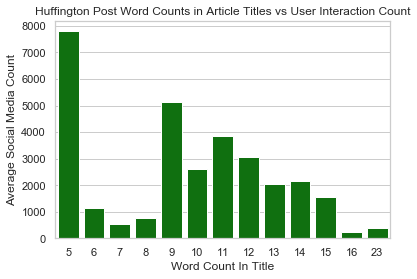

In [274]:
wordCountAvgSocialMedia.describe()
#high number of words in title: 23
#low number of words in title: 5
#there seems to be no correlation between word count in title and social mediaCount for that article
wordCountAvgSocialMedia
import seaborn as sns
sns.set(style="whitegrid")
plotData = wordCountAvgSocialMedia
plotData.columns = ['totalArticlesWithTitleCount', 'Word Count In Title', 'Average Social Media Count']
ax = sns.barplot(x="Word Count In Title", y="Average Social Media Count", data=plotData, color='green').set_title('Huffington Post Word Counts in Article Titles vs User Interaction Count')


In [263]:
articlesDF.to_csv('huffArticlesIntercationsCount.csv', index = False)
wordCountsDF.to_csv('huffWordCounts.csv', index = False)
averageInteractsPerWord.to_csv('huffWordAvgInteractionsCount.csv', index = False)
wordCountAvgSocialMedia.to_csv('huffWordCountAvgCommentCount.csv', index = False)
